# Laboratorio 7
## Predicción de Diabetes con AutoGluon 🩺💻

~ Samuel Chamale 21885

~ Adrian Rodriguez 21691

> *Repositorio : https://github.com/UVG-Works-Hub/autogluon-diabetes-prediction* 

### Descripción

El objetivo de este ejercicio es construir, entrenar y probar un modelo clasificador para predecir diabetes en pacientes usando **AutoGluon**. Esta herramienta podría ser utilizada de manera efectiva por profesionales de la salud para detectar diabetes y entender los factores clave que contribuyen a la enfermedad.


---

### 1. Carga del Conjunto de Datos 📥

In [2]:
# Importar librerías necesarias
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('diabetes.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Nota*: Asegúrate de que el archivo `diabetes.csv` esté en el directorio de trabajo actual.

---

### 2. Análisis Exploratorio de Datos (EDA) 🔍

#### a) Estadísticas Descriptivas 📊

**Obtenga estadísticas descriptivas básicas del conjunto de datos.**

In [3]:
# Obtener estadísticas descriptivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Comentario*: Esto nos proporciona información sobre la media, desviación estándar, valores mínimos y máximos, y percentiles de cada variable.

#### b) Visualización de la Distribución de las Variables 📈

**Visualice la distribución de las variables.**

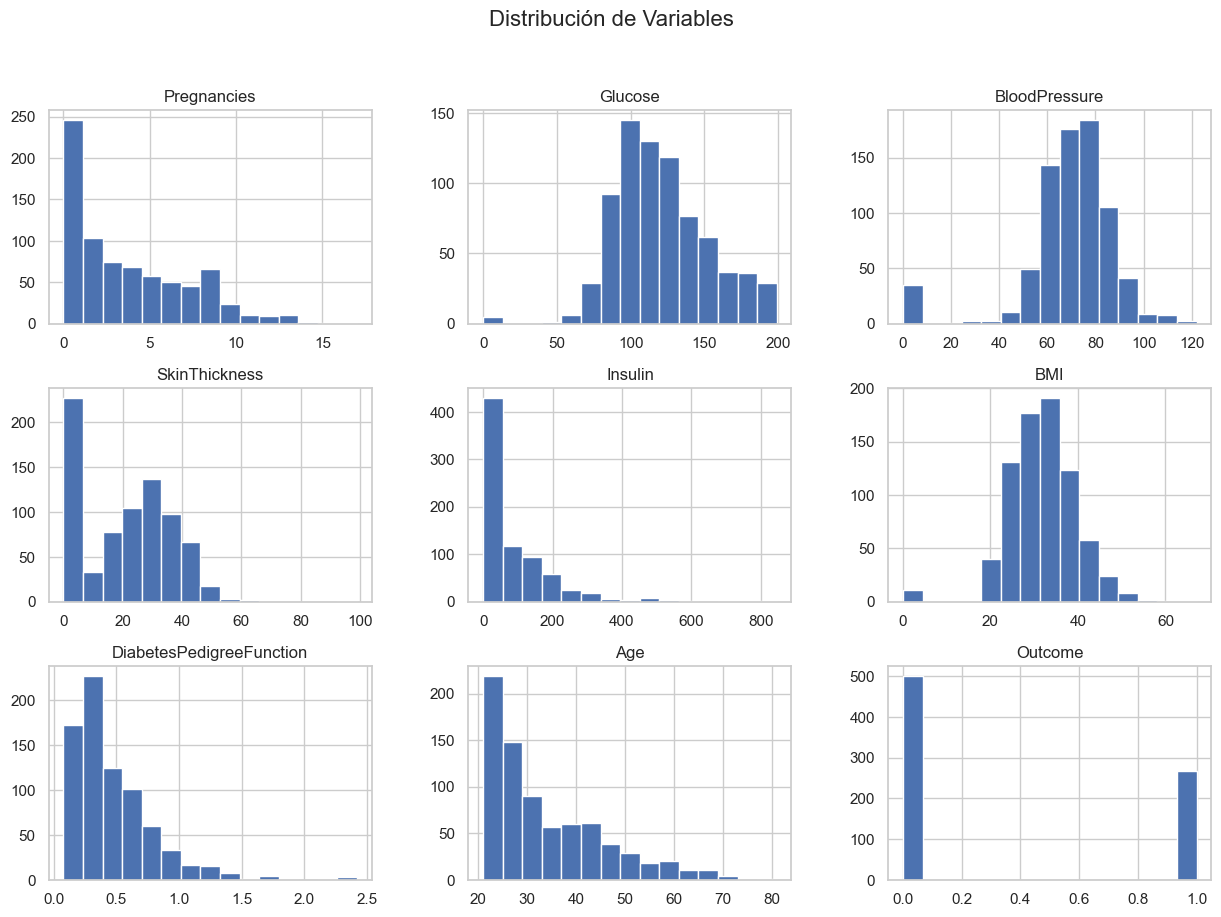

In [4]:
# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear histogramas para cada variable
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribución de Variables", fontsize=16)
plt.show()

*Comentario*: Los histogramas nos ayudan a entender la distribución y detectar posibles sesgos o anomalías en los datos.

#### c) Valores Nulos o Atípicos ⚠️

**Verifique la presencia de valores nulos o atípicos y decida cómo manejarlos.**


Valores nulos en cada columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


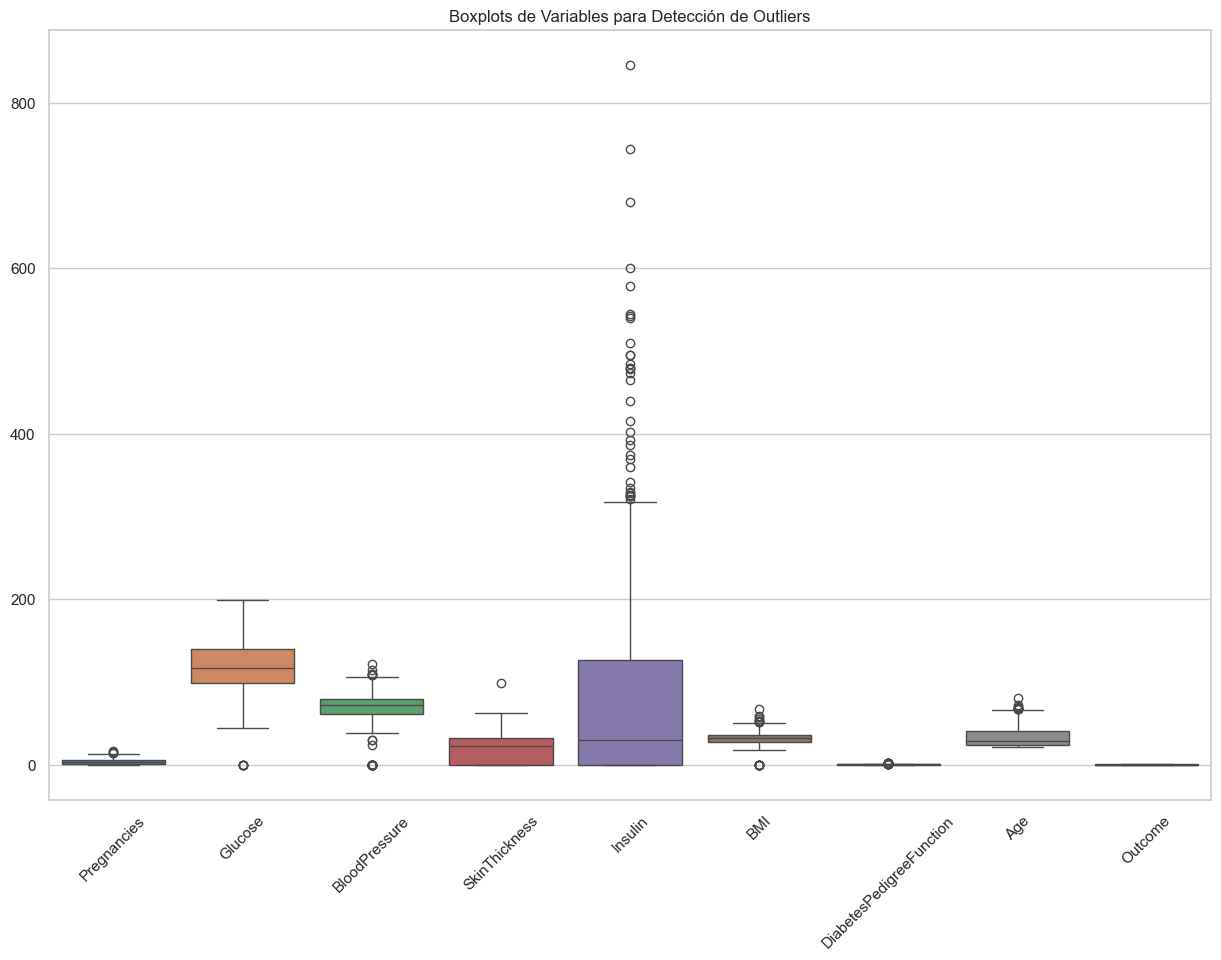

In [5]:
# Verificar valores nulos
print("Valores nulos en cada columna:")
print(df.isnull().sum())

# Detectar valores atípicos con boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots de Variables para Detección de Outliers")
plt.xticks(rotation=45)
plt.show()

*Comentario*: No hay valores nulos en el conjunto de datos, pero los boxplots indican la presencia de valores atípicos en algunas variables.

**Manejo de Valores Atípicos**

Decidimos manejar los valores atípicos utilizando el método del rango intercuartílico (IQR).

In [6]:
# Función para eliminar outliers
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado

# Aplicar la función a las columnas numéricas
columnas_numericas = df.columns.drop('Outcome')
for columna in columnas_numericas:
    df = eliminar_outliers(df, columna)

# Verificar el nuevo tamaño del DataFrame
print("Tamaño del DataFrame después de eliminar outliers:", df.shape)

Tamaño del DataFrame después de eliminar outliers: (636, 9)


*Comentario*: Al eliminar los valores atípicos, mejoramos la calidad de los datos para el entrenamiento del modelo.

---

### 3. Entrenamiento con AutoGluon 🚀

**Utilice la opción `best_quality` del parámetro “preset” y la métrica `accuracy`.**

**Entrene varios modelos de clasificación con AutoGluon para predecir la columna "Outcome".**

*Nota*: Para instalar AutoGluon se sugiere ver la siguiente guía. Como recomendación personal sugerimos utilizar Conda. https://auto.gluon.ai/dev/install.html

In [ ]:
from autogluon.tabular import TabularPredictor

# Definir la variable objetivo
objetivo = 'Outcome'

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Entrenar el modelo con AutoGluon
predictor = TabularPredictor(label=objetivo, eval_metric='accuracy').fit(
    train_data=train_data,
    presets='best_quality'
)